In [58]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [59]:
#Importing the csv from local folder
#The world_bank file contained a lot of aggragated rows that are not countries
#A lot of missing data points for age GDP and population, these ere removed for this study
#This file was cleaned using data columns and another python program, which used a country list to loop through
# and removed non country rows and missing data rows.
#It compared world_bank data against a list of real countries, using two loops, ensuring the program logged
#position on the country list so the country list got shorter each visit to it.
#This can go on github if required.

world_data = pd.read_csv('world_bank_countries_only.csv')
#A quick look at whats in the original file showed summing non country lines which caused outliner crowding 
#world_data.info

In [60]:
#Because there are such a huge difference in the population sizes in this data set, I will
#try to spread them out by using two graphs with arbitrary cut off point of 100 million people
sorted_by_pop = world_data.sort_values(by='2019 Population')

max = sorted_by_pop["2019 Population"].max()
print("Max population value for labeling",max)
#Note: the index now has missing number where lines were removed in cleaning 

Max 1397715000


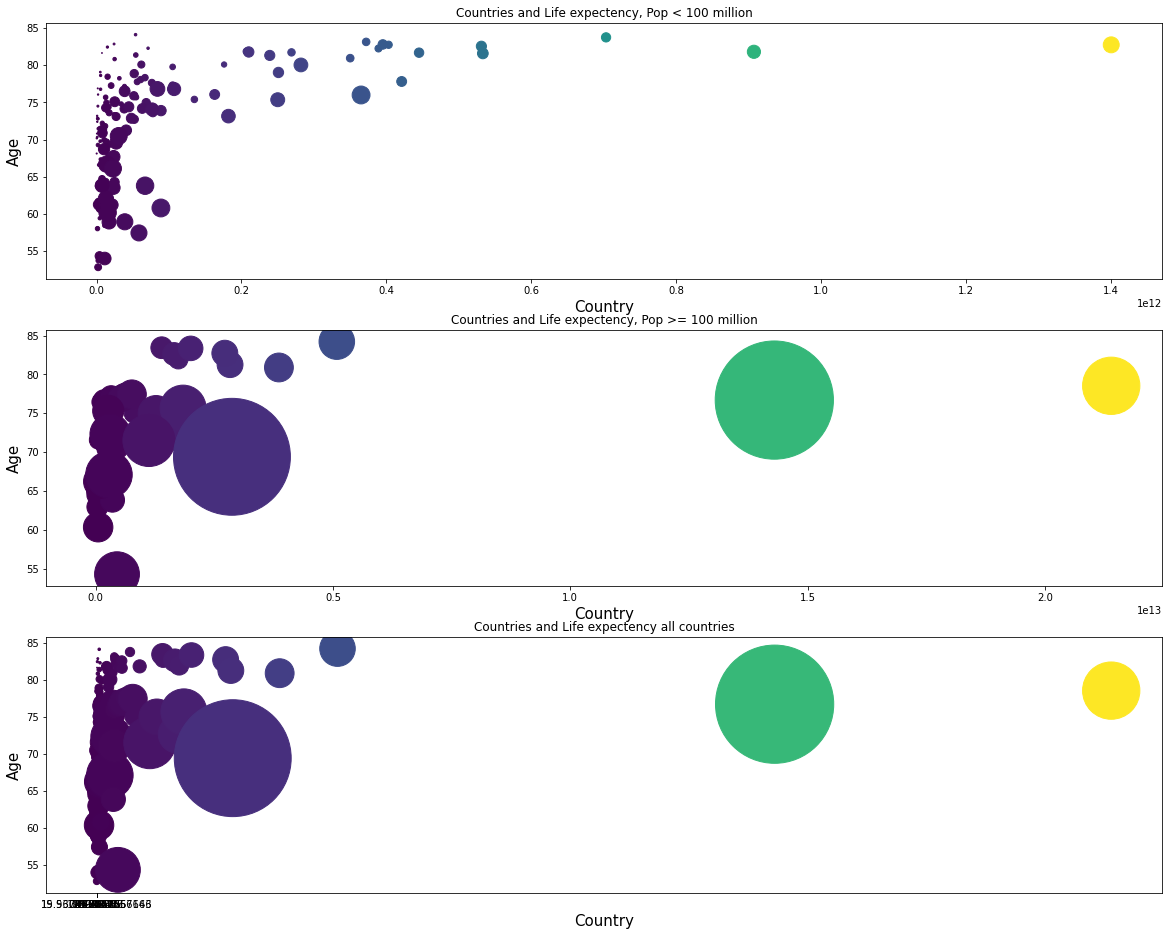

In [68]:
# Set plot frame

#Set out sub plots/charts
# Form the plot figure and border size
fig, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(20,16))

#Using standard division to indentify tick mark positions
collect = [0]
gap = 0
for i in range(11,0,-1):
    gap = (max/i)/10000000
    collect.append(gap)

#Preparing x axis labeling
ax3.set_xticks(np.arange(0, max, step=116476250), minor=False)
ax3.set_xticklabels(collect) #From calc above
#Now select the plot data all the data set
x = world_data["2019 GDP (USD$)"]
y = world_data["Life Expectancy at Birth"]
#Size the bubbles
volume1 = ((world_data["2019 Population"]/100000))
close1 =  (x/100)

#Find arbitrary population cut off say 100 million, from tail of sorted list
#print("test", world_data["2019 Population"][136])

#The selection of countries < 100 million
x2 =sorted_by_pop["2019 GDP (USD$)"][136:]
y2 = sorted_by_pop["Life Expectancy at Birth"][136:]
#Size the bubbles
volume2 = ((sorted_by_pop["2019 Population"][136:]/100000))
close2 =  (x2/100)

#The selection of countries >= 100 million
x3 = sorted_by_pop["2019 GDP (USD$)"][:137]
y3 = sorted_by_pop["Life Expectancy at Birth"][:137]
#Size the bubbles
volume3 = ((sorted_by_pop["2019 Population"][:137]/100000))
close3 =  (x3/100)

# Set out labels
ax1.set_xlabel('Country', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Countries and Life expectency, Pop < 100 million')

ax2.set_xlabel('Country', fontsize=15)
ax2.set_ylabel('Age', fontsize=15)
ax2.set_title('Countries and Life expectency, Pop >= 100 million')

ax3.set_xlabel('Country', fontsize=15)
ax3.set_ylabel('Age', fontsize=15)
ax3.set_title('Countries and Life expectency all countries')

#Produce the actual plots
ax1.scatter(x3, y3,c = close3,s =volume3)
ax2.scatter(x2, y2,c = close2,s =volume2)
ax3.scatter(x, y,c = close1,s =volume1)

plt.show()

In [67]:
#I cant't fix this labeling here at the bottom, I am too tired to continue
print(collect) #These are the values
print(np.arange(0, max, step=116476250)) #These are the x tick marks

[0, 12.7065, 13.97715, 15.530166666666666, 17.4714375, 19.967357142857143, 23.29525, 27.9543, 34.942875, 46.5905, 69.88575, 139.7715]
[         0  116476250  232952500  349428750  465905000  582381250
  698857500  815333750  931810000 1048286250 1164762500 1281238750]


In [ ]:
#Putting country names on here would turn into a mess
#If I get time I will look at bonus part